In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Standardization
from sklearn import preprocessing

#Dividing train and test
from sklearn.model_selection import train_test_split

#Checking R2 Score and Mean Squared Error
from sklearn.metrics import r2_score, mean_squared_error

#Gets Ordinary Least Squares Results
from sklearn.linear_model import LinearRegression

In [2]:
#Load data
df = pd.read_csv("Advertising.csv", index_col = 0)

#prints and displays
print("Size of data:", df.shape)
df.head()

df.describe()

df.dtypes

Size of data: (200, 4)


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [3]:
df_temp = df.copy()

#TV
tv_MEAN = df_temp['TV'].mean()
tv_STD = df_temp['TV'].std()
df_temp['TV'] = (df_temp['TV'] - tv_MEAN)/tv_STD

#Radio
radio_MEAN = df_temp['Radio'].mean()
radio_STD = df_temp['Radio'].std()
df_temp['Radio'] = (df_temp['Radio'] - radio_MEAN)/radio_STD

#Newspaper
news_MEAN = df_temp['Newspaper'].mean()
news_STD = df_temp['Newspaper'].std()
df_temp['Newspaper'] = (df_temp['Newspaper'] - news_MEAN)/news_STD

#Sales
sale_MEAN = df_temp['Sales'].mean()
sale_STD = df_temp['Sales'].std()
df_temp['Sales'] = (df_temp['Sales'] - sale_MEAN)/sale_STD

df_temp

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


In [4]:
#preprocessing.scale function from sklearn
df_standard = preprocessing.scale(df)

#Convert Standardized data to dataframe
df_standard = pd.DataFrame(df_standard, columns = df.columns)

df_standard

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [5]:
#adding a column with value of 1
df_standard.insert(0,'origin',1)
df_standard

,origin,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [6]:
x = df_standard[['origin','TV','Radio','Newspaper']]
y = df_standard['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15)

print("x_train = ", x_train.shape)
print("y_train = ", y_train.shape)
print("x_test = ", x_test.shape)
print("y_test = ", y_test.shape)

x_train =  (170, 4)
y_train =  (170,)
x_test =  (30, 4)
y_test =  (30,)


In [7]:
def initialize_theta(x, random=False):
    xLength = x.shape[1]
    
    if random:
        return np.random.rand(xLength)
    return np.zeros(xLength)

#Initializing in random
theta = initialize_theta(x_train, random=True)
theta

array([0.82676515, 0.23059441, 0.14422402, 0.08076867])

In [8]:
#Initializing in Zeros
theta = initialize_theta(x_train)
theta

array([0., 0., 0., 0.])

In [9]:
def predict(x, theta):
    y_hat = np.dot(x, theta)
    
    return y_hat

In [10]:
y_hat_train = predict(x_train, initialize_theta(x_train, random = True))

df_train = pd.DataFrame({'Real Values' : y_train, 'Prediction Values' : y_hat_train})
df_train

,Real Values,Prediction Values
153,0.956403,0.277438
132,-1.599129,-0.671198
107,-1.022693,-0.322683
3,0.860330,0.473059
56,-1.637558,-0.207997
...,...,...
93,1.571268,0.896509
197,-0.234898,-0.226410
24,-0.830548,-0.399276
164,-0.407828,-0.382755


In [11]:
def compute_cost(x, y, theta):
    m = len(y)
    
    #soves for cost using the given formula
    cost = 1/(2*m) * np.sum((predict(x, theta) - y)**2)
    return cost

#printing the cost using the training set
testCost = compute_cost(x_train, y_train, initialize_theta(x_train, random = True))
print(testCost)

0.4165887692410417


In [12]:
def compute_gradient(x, y, theta):
    m = len(y)
    w = 1/m * np.dot(x.T, (predict(x, theta) - y))

    return w

In [13]:
def new_theta (x, y, theta, a):
    new_theta = theta - a * compute_gradient(x, y, theta)
    
    return new_theta

In [14]:
def grad_descent(x, y, theta, alpha, iterations):
    
    theta_matrix = [0] * iterations
    cost_matrix = [0] * iterations

    for i in range(iterations):
        # Update the theta
        theta = new_theta(x, y, theta, alpha)
        # Save the theta in the theta matrix
        theta_matrix[i] = theta
        # Compute the cost
        cost = compute_cost(x, y, theta)
        # Save the cost in the cost history theta
        cost_matrix[i] = cost
    
    return theta_matrix, cost_matrix

In [15]:
def plot_costs(cost_array):
    # Set the size of the plot
    plt.figure(figsize=(20, 10))
    plt.plot(cost_array)
    
    plt.title('Cost over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

In [16]:
theta = initialize_theta(x_train, random=True)
y_hat_train = predict(x_train, theta)
y_hat_train_df = pd.DataFrame({'Real Values': y_train, 'Prediction Values': y_hat_train})
y_hat_train_df

,Real Values,Prediction Values
153,0.956403,0.327220
132,-1.599129,-0.606412
107,-1.022693,-0.204276
3,0.860330,0.291940
56,-1.637558,-0.498741
...,...,...
93,1.571268,0.810492
197,-0.234898,0.196585
24,-0.830548,-0.328365
164,-0.407828,-0.088939


In [17]:
train_cost = compute_cost(x_train, y_train, theta)
train_cost

0.23555802113391727

In [18]:
theta = initialize_theta(x_test, random=True)
y_hat_test = predict(x_test, theta)
y_hat_test_df = pd.DataFrame({'Real Values': y_test, 'Prediction Values': y_hat_test})
y_hat_test_df['Residual'] = y_hat_test_df['Real Values'] - y_hat_test_df['Prediction Values']
y_hat_test_df

,Real Values,Prediction Values,Residual
54,1.186977,1.345597,-0.158620
92,1.033261,1.443429,-0.410168
5,-1.310911,0.659880,-1.970791
44,-1.061122,-0.760491,-0.300631
111,1.494410,1.760018,-0.265609
162,0.168607,0.098369,0.070238
33,0.648971,0.761869,-0.112898
70,0.821901,1.013341,-0.191439
188,0.360753,0.580599,-0.219846
187,0.629756,0.734491,-0.104735


In [19]:
testCost = compute_cost(x_test, y_test, theta)
testCost

0.13197176559875842

In [20]:
theta = initialize_theta(x_train, random=True)

iterations = 10000
alpha = 0.01

theta_matrix_train, cost_matrix_train = grad_descent(x_train, y_train, theta, alpha, iterations)

theta_matrix_test, cost_matrix_test = grad_descent(x_test, y_test, theta, alpha, iterations)

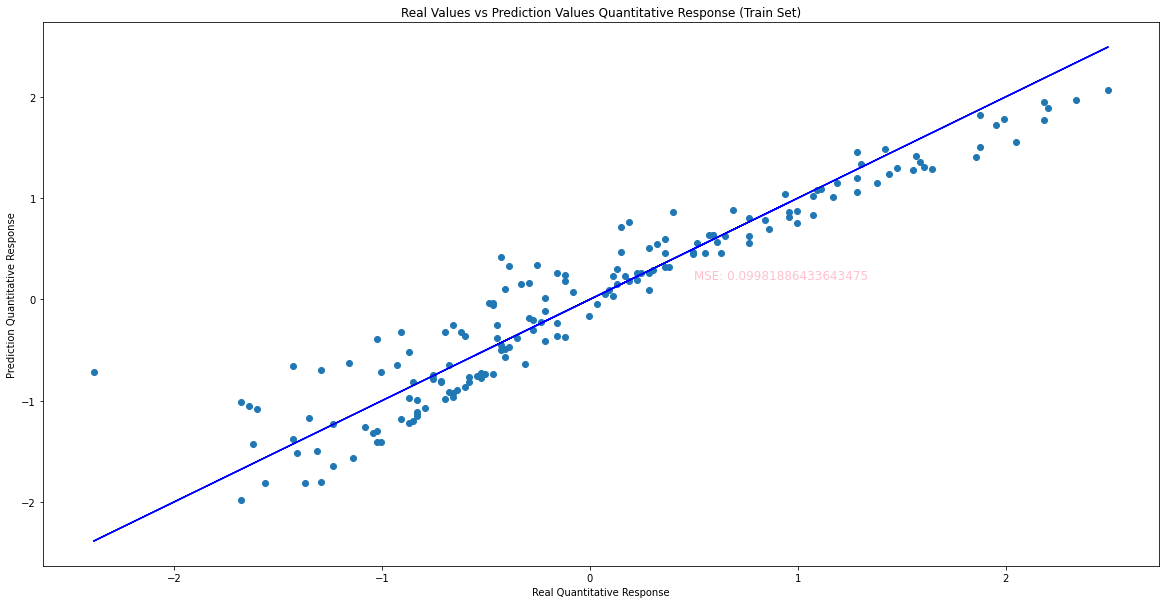

In [21]:
y_hat_train = predict(x_train, theta_matrix_train[-1])

# For plotting
plt.figure(figsize=(20, 10))
plt.title('Real Values vs Prediction Values Quantitative Response (Train Set)')
plt.xlabel('Real Quantitative Response')
plt.ylabel('Prediction Quantitative Response')
plt.scatter(y_train, y_hat_train)

# Best Fit Line
plt.plot(y_train, y_train, color='blue')
#Shows MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_train, y_hat_train)}", color='pink', fontsize=12)
plt.show()

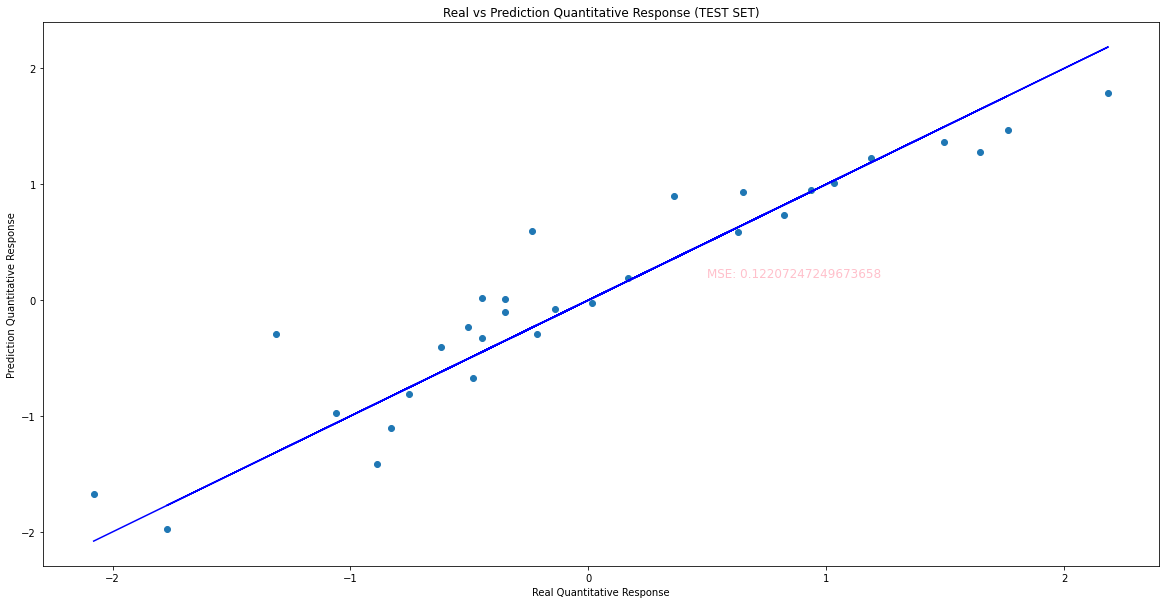

In [22]:
y_hat_test = predict(x_test, theta_matrix_train[-1])

plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_hat_test)
plt.title('Real vs Prediction Quantitative Response (TEST SET)')
plt.xlabel('Real Quantitative Response')
plt.ylabel('Prediction Quantitative Response')

# Best Fit Line
plt.plot(y_test, y_test, color='blue')
#Shows MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_test, y_hat_test)}", color='pink', fontsize=12)
plt.show()

In [23]:
df_standard

# Add the Predicted Sales column to the dataframe
df_standard['Predicted Sales'] = predict(df_standard[['origin', 'TV', 'Radio', 'Newspaper']], theta_matrix_train[-1])


# Convert the standardized residuals back to the original scale (for all columns)
df_standard['TV'] = df_standard['TV'] * df['TV'].std() + df['TV'].mean()
df_standard['Radio'] = df_standard['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standard['Newspaper'] = df_standard['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standard['Sales'] = df_standard['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standard['Predicted Sales'] = df_standard['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

# Calculate the Residuals
df_standard['Residuals'] = df_standard['Sales'] - df_standard['Predicted Sales']

# Drop the all_ones column
df_standard.drop('origin', axis=1, inplace=True)

df_standard

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.673105,1.447165
1,44.242678,39.340241,45.136502,10.390910,12.338894,-1.947985
2,16.874171,45.956803,69.397230,9.288149,12.347279,-3.059130
3,151.511186,41.345260,58.570128,18.511236,17.670704,0.840532
4,180.884712,10.768723,58.469877,12.897183,13.399348,-0.502164
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.419939,2.163945
196,94.067396,4.853917,8.043654,9.689153,8.211974,1.477179
197,177.075176,9.264959,6.339388,12.796932,12.838362,-0.041429
198,283.942679,42.047016,66.289451,25.528802,23.908540,1.620262


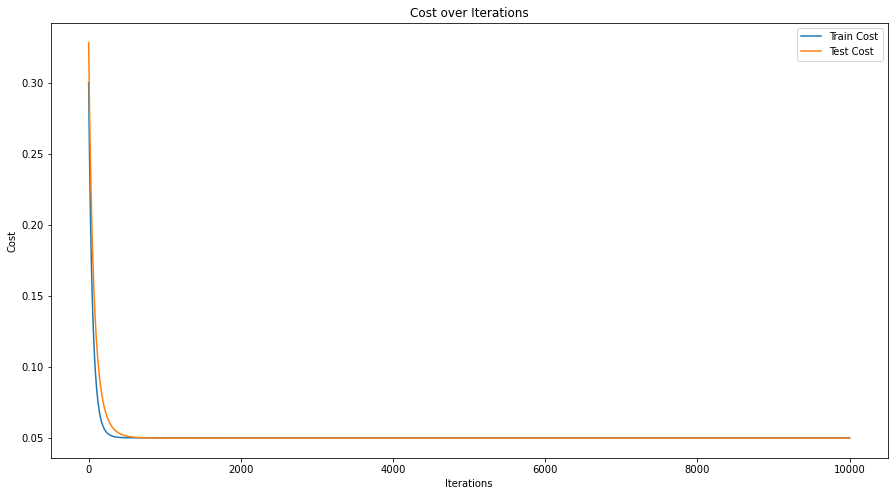

In [24]:
plt.figure(figsize=(15,8))
plt.plot(cost_matrix_train, label='Train Cost')
plt.plot(cost_matrix_test, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.legend()
plt.show()

In [25]:
#zero theta as original theta
init_t = initialize_theta(x_train)
#setting learning rate and iteration
alpha = 0.01
iterations = 50000
#for gradient descent
theta_matrix, cost_matrix = grad_descent(x_train, y_train, init_t, alpha, iterations)

optimal_theta = theta_matrix[-1]

print(f"Optimal Theta: {optimal_theta}")
print(f"Linear Regression Equation : y = {optimal_theta[0]} + {optimal_theta[1]}*TV + {optimal_theta[2]}*Radio + {optimal_theta[3]}*Newspaper")

Optimal Theta: [0.01132617 0.75703501 0.52325754 0.00874452]
Linear Regression Equation : y = 0.011326168197066909 + 0.7570350058287548*TV + 0.523257537084655*Radio + 0.008744524316019128*Newspaper


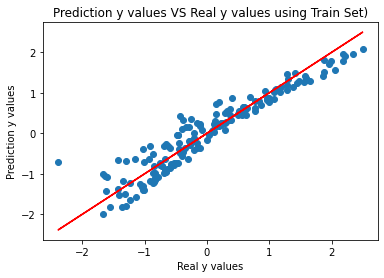

In [26]:
#Scatterplot of real y values VS prediction y values using the train set
predict_train = predict(x_train, optimal_theta)
plt.scatter(y_train, predict_train)
plt.xlabel('Real y values')
plt.ylabel('Prediction y values')
plt.title('Prediction y values VS Real y values using Train Set)')
plt.plot(y_train, y_train, color='red')
plt.show()

In [27]:
print(f"The r2 score = {r2_score(y_train, predict_train)}")

The r2 score = 0.8990896822428788


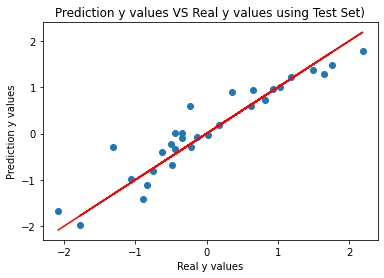

The r2 score = 0.8849537640173426


In [28]:
# Scatter plot of real y values vs prediction y values using test set
predict_test = predict(x_test, optimal_theta)
plt.scatter(y_test, predict_test)
plt.xlabel('Real y values')
plt.ylabel('Prediction y values')
plt.title('Prediction y values VS Real y values using Test Set)')
plt.plot(y_test, y_test, color='red')
plt.show()

print(f"The r2 score = {r2_score(y_test, predict_test)}")

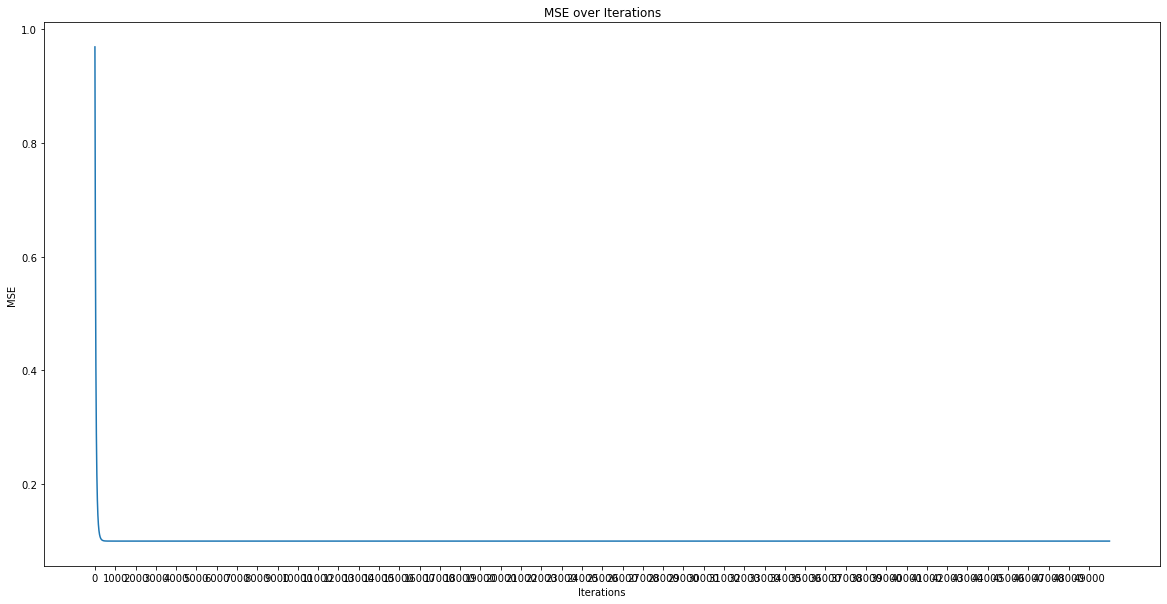

In [29]:
#Getting the Mean Squared Error for the iteration
MSE_arr = []
for i in range(iterations):
    MSE = mean_squared_error(y_train, predict(x_train, theta_matrix[i]))
    MSE_arr.append(MSE)
    
#plotting the MSE
plt.figure(figsize=(20, 10))
plt.plot(MSE_arr)
plt.title('MSE over Iterations')
plt.xlabel('Iterations')
plt.xticks(np.arange(0, iterations, 1000))
plt.ylabel('MSE')
plt.show()

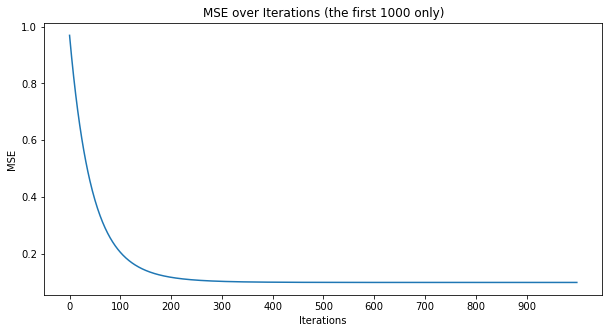

In [30]:
#Closer version
#MSE over iterations (the first 1000 only)
plt.figure(figsize=(10,5))
plt.plot(MSE_arr[0:1000])
plt.title('MSE over Iterations (the first 1000 only)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

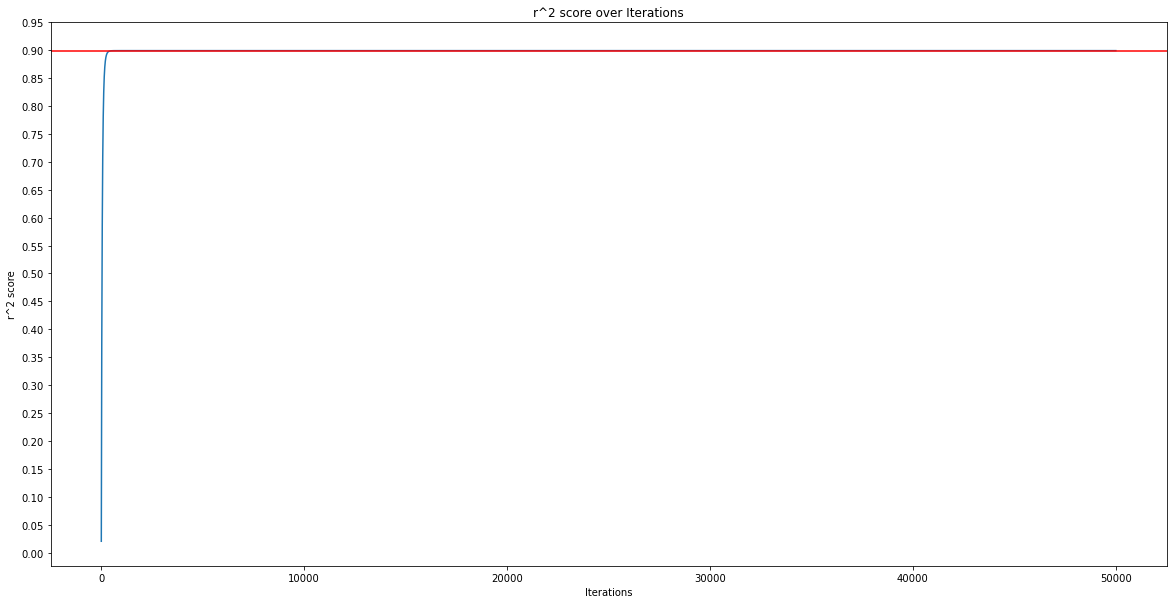

The maximum r^2 score = 0.8990896822428788


In [31]:
#Getting the r^2 score for the iteration
r2_array = []
for i in range(iterations):
    r2 = r2_score(y_train, predict(x_train, theta_matrix[i]))
    r2_array.append(r2)
    
#plotting the MSE
plt.figure(figsize=(20, 10))
plt.plot(r2_array)
plt.title('r^2 score over Iterations')
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.yticks(np.arange(0, 1, 0.05))
# Marking the maximum r^2 score
plt.axhline(y=max(r2_array), color='red')
plt.show()


print(f"The maximum r^2 score = {max(r2_array)}")

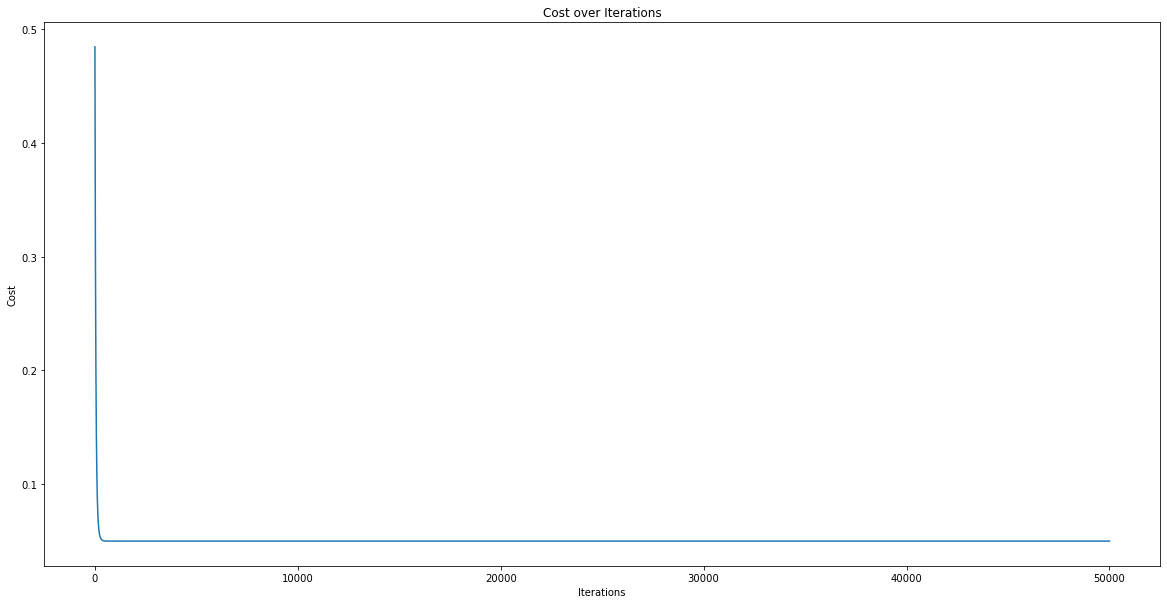

In [32]:
#Plotting the cost over iterations
plot_costs(cost_matrix)

In [33]:
def optimal_iterations(max_r2, r2_array):
    for i in range(len(r2_array)):
        if r2_array[i] == max_r2:
            return i
        
optimal_num = optimal_iterations(max(r2_array),r2_array)
print(f'The optimal number of iterations is {optimal_num}')

The optimal number of iterations is 2703


In [34]:
print(f'Cost at the optimal number of iterations = {cost_matrix[optimal_num]}')

print(f'Weights at the optimal number of iterations = {theta_matrix[optimal_num]}')

print(f'\nThe cost at the last iteration = {cost_matrix[-1]}')
print(f'The weights at the last iteration = {theta_matrix[-1]}')

Cost at the optimal number of iterations = 0.049909432168217374
Weights at the optimal number of iterations = [0.01132617 0.757035   0.52325753 0.00874453]

The cost at the last iteration = 0.049909432168217374
The weights at the last iteration = [0.01132617 0.75703501 0.52325754 0.00874452]


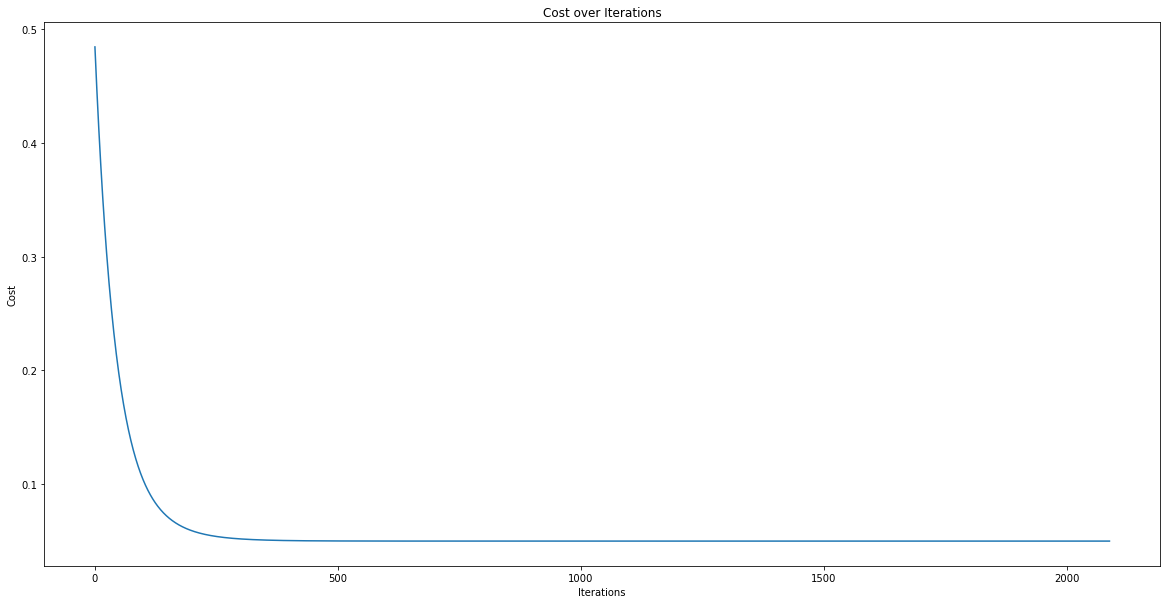

In [35]:
def gradient_descent_optimized(x, y, theta, alpha, iterations, diff_threshold):
    theta_matrix = []
    cost_matrix = []
    last_it = 0

    for i in range(iterations):
        theta = new_theta(x, y, theta, alpha)
        theta_matrix.append(theta)
        cost = compute_cost(x, y, theta)
        cost_matrix.append(cost)

        if i > 0 and abs(cost_matrix[i] - cost_matrix[i-1]) < diff_threshold:
            last_it = i
            break
        last_it = i

    return theta_matrix, cost_matrix, last_it

iterations = 50000
alpha = 0.01

diff_threshold = 1.0e-15

theta_matrix, cost_matrix, optimal_iterations = gradient_descent_optimized(x_train, y_train, init_t, alpha, iterations, diff_threshold)

plot_costs(cost_matrix)

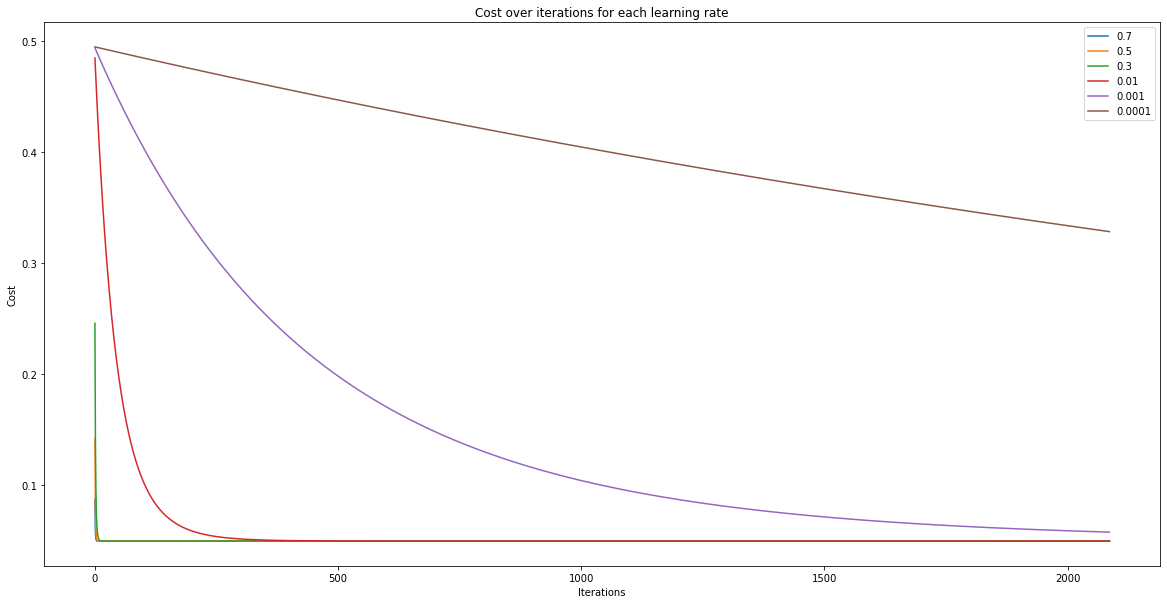

In [36]:
init_t = initialize_theta(x_train)

iterations = optimal_iterations

#Learning rates
learning_rates = [0.7, 0.5, 0.3, 0.01, 0.001, 0.0001]

cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
cost_matrix_dict = {i:[] for i in learning_rates}

for alpha in learning_rates:
    theta_matrix, cost_matrix = grad_descent(x_train, y_train, init_t, alpha, iterations)
    cost_dict[alpha] = cost_matrix[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(x_train, theta_matrix[-1]))
    cost_matrix_dict[alpha] = cost_matrix

plt.figure(figsize=(20,10))
for alpha in learning_rates:
    plt.plot(cost_matrix_dict[alpha], label = alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for each learning rate')
plt.legend()
plt.show()

In [37]:
learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'MSError': list(error_dict.values())})
learning_rates

,Learning Rate,Cost,MSError
0,0.7000,0.049909,0.099819
1,0.5000,0.049909,0.099819
2,0.3000,0.049909,0.099819
3,0.0100,0.049909,0.099819
4,0.0010,0.057965,0.115930
5,0.0001,0.328305,0.656610


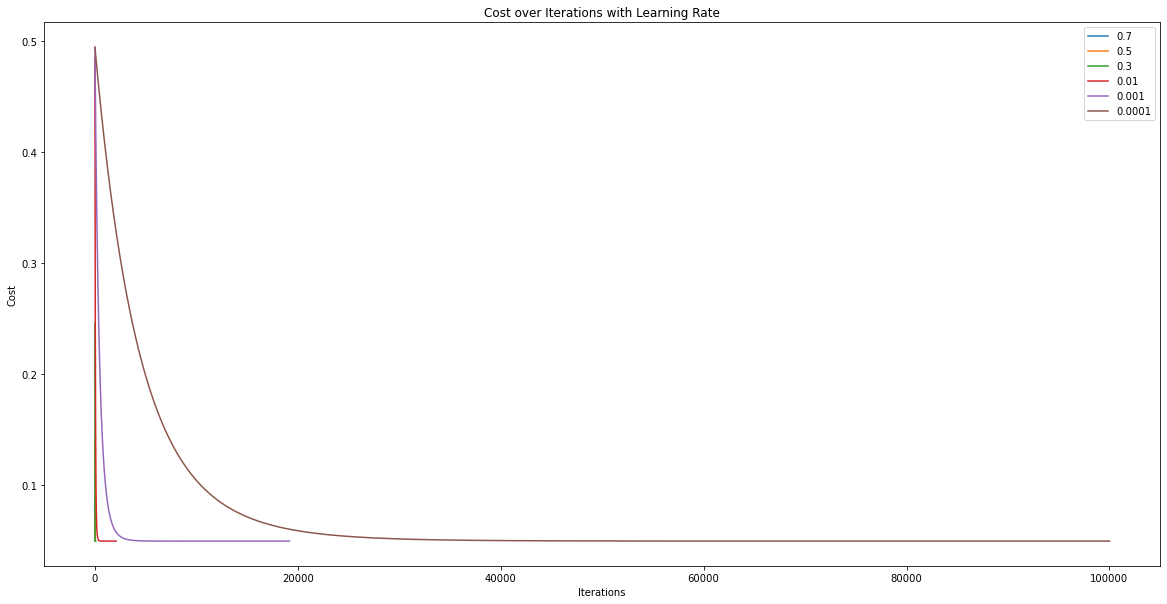

In [38]:
init_w = initialize_theta(x_train)

iterations = 100000

learning_rates = [0.7, 0.5, 0.3, 0.01, 0.001, 0.0001]

cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
cost_matrix_dict = {i:[] for i in learning_rates}
optimal_iterations_dict = {i:0 for i in learning_rates}

diff_threshold = 1.0e-15

for alpha in learning_rates:

    theta_matrix, cost_matrix, optimal_iterations = gradient_descent_optimized(x_train, y_train, init_t, alpha, iterations, diff_threshold)

    cost_dict[alpha] = cost_matrix[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(x_train, theta_matrix[-1]))
    cost_matrix_dict[alpha] = cost_matrix
    optimal_iterations_dict[alpha] = optimal_iterations

# Plot plotting
plt.figure(figsize=(20, 10))
for alpha in learning_rates:
    plt.plot(cost_matrix_dict[alpha], label=alpha)
plt.title('Cost over Iterations with Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [39]:
df_learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'MSE': list(error_dict.values()), 'Optimal Iterations': list(optimal_iterations_dict.values())})
df_learning_rates

,Learning Rate,Cost,MSE,Optimal Iterations
0,0.7000,0.049909,0.099819,26
1,0.5000,0.049909,0.099819,40
2,0.3000,0.049909,0.099819,71
3,0.0100,0.049909,0.099819,2087
4,0.0010,0.049909,0.099819,19177
5,0.0001,0.049910,0.099819,99999


In [40]:
from sklearn.linear_model import LinearRegression
ordinary_least_squares = LinearRegression()
ordinary_least_squares.fit(x_train, y_train).coef_

#r^2 score for the Ordinary Least Squares and the Gradient Descent Algorithm
r2_OLS = r2_score(y_train, ordinary_least_squares.predict(x_train))
r2_GDA = r2_array[-1]

print(f"The results of OLS is {r2_OLS}")
print(f"The results of GDA is {r2_GDA}")

The results of OLS is 0.8990896822428788
The results of GDA is 0.8990896822428788
